# Mental Health in Tech Survey
My project explores how mental health of workers in tech is influenced by both their environment and other aspects of themselves such as age and gender. I hope to be able to identify patterns in specific aspects of the work place with as little bias as possible.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/survey.csv')

In [ ]:
cleaned_df = dataset[(dataset['Age'] >= 0) & (dataset['Age'] <= 100)]

In [ ]:
print(cleaned_df.head())
print(cleaned_df.describe())
#print(cleaned_df.tail())

         Timestamp  Age  Gender         Country state self_employed  \
0  8/27/2014 11:29   37  Female   United States    IL           NaN   
1  8/27/2014 11:29   44       M   United States    IN           NaN   
2  8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3  8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4  8/27/2014 11:30   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often          25-Jun  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely          25-Jun  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know     

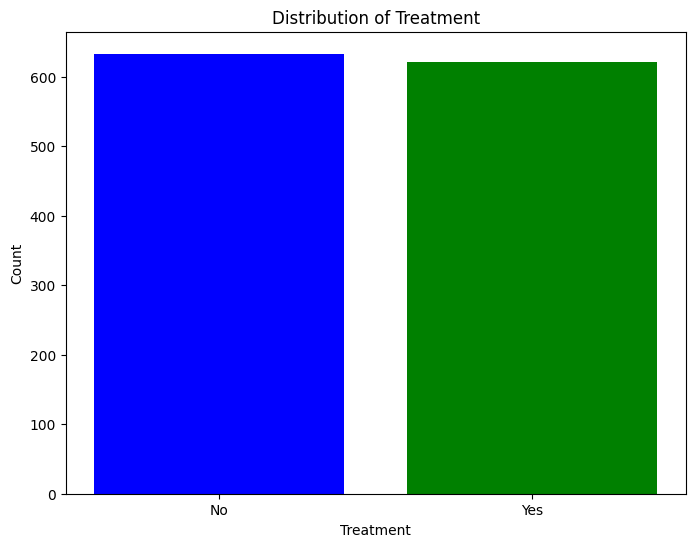

In [ ]:
import matplotlib.pyplot as plt
treatment_counts = cleaned_df['treatment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(treatment_counts.index, treatment_counts.values, color=['blue', 'green'])
plt.title('Distribution of Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.xticks(treatment_counts.index, ['No', 'Yes'])
plt.show()

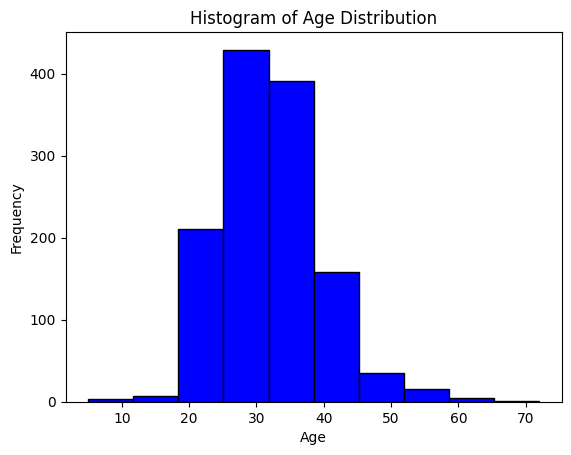

In [ ]:
#gender_mapping = {'Male': 1, 'Female': 2, 'M':1, 'male':1, 'female':2, 'F':2}
#dataset['Gender'] = dataset['Gender'].map(gender_mapping)
plt.hist(cleaned_df['Age'], bins=10, color = 'blue', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()

In [ ]:
cleaned_df = dataset[(dataset['Gender'] == "Male") |
                    (dataset['Gender'] == "male") |
                    (dataset['Gender'] == "M") |
                    (dataset['Gender'] == "m") |
                    (dataset['Gender'] == "Female") |
                    (dataset['Gender'] == "female") |
                    (dataset['Gender'] == "F") |
                    (dataset['Gender'] == "f")]
gender_mapping = {'M':'Male', 'male':'Male', 'female':'Female', 'F':'Female', 'm':'Male', 'f':'Female'}
cleaned_df['Gender'] = dataset['Gender'].map(gender_mapping)
#rem_mapping = {'No':0, 'Yes':1}
#cleaned_df['remote_work'] = dataset['remote_work'].map(rem_mapping)
#plt.scatter(dataset["Gender"],dataset["remote_work"])
#print(dataset["Gender"])
#print(dataset["remote_work"])
#plt.hist(cleaned_df['Gender'], bins=10, color = 'blue', edgecolor = 'black')

<ipython-input-135-59230dbcbd29>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Gender'] = dataset['Gender'].map(gender_mapping)


<ipython-input-136-22f149ef4fce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Gender'].fillna('Other', inplace=True)


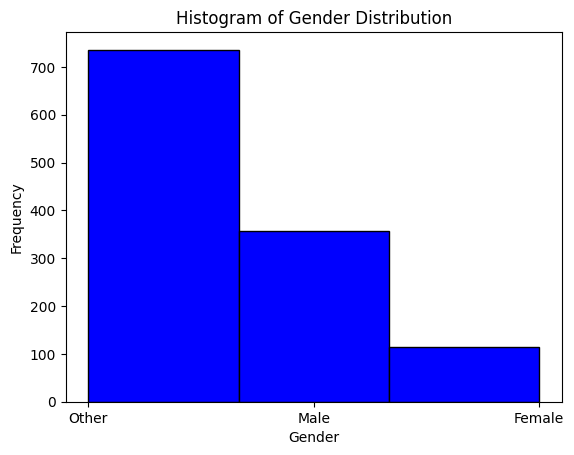

In [ ]:
cleaned_df['Gender'].fillna('Other', inplace=True)
plt.hist(cleaned_df['Gender'], bins=3, color = 'blue', edgecolor = 'black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender Distribution')
plt.show()

In [ ]:
cleaned_df = dataset[(dataset['work_interfere'] == "Often") |
                    (dataset['work_interfere'] == "Rarely") |
                    (dataset['work_interfere'] == "Sometimes") |
                    (dataset['work_interfere'] == "Never")]
cleaned_df_rw = cleaned_df['remote_work'] == "Yes"

<ipython-input-138-a1b283ed3c9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['work_interfere'] = cleaned_df['work_interfere'].replace({


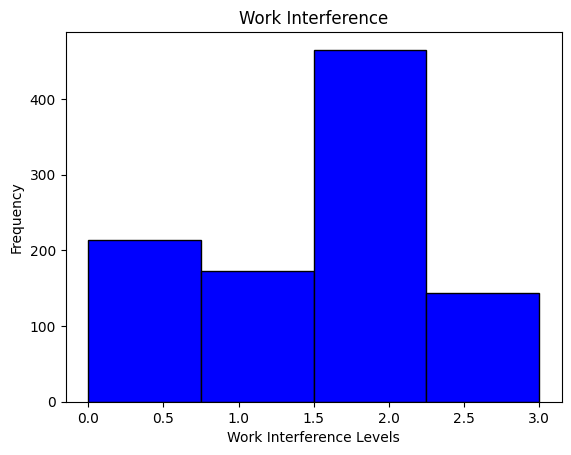

In [ ]:
cleaned_df['work_interfere'] = cleaned_df['work_interfere'].replace({
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3
})
plt.hist(cleaned_df['work_interfere'], bins=4, color='blue', edgecolor='black')
plt.title("Work Interference")
plt.xlabel("Work Interference Levels")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
columns_of_interest = ['treatment', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview']
df = cleaned_df[columns_of_interest]
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview'])
X = df.drop('treatment', axis=1)
y = df['treatment']
model = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(model, X, y, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Accuracy: 0.6432160804020101
              precision    recall  f1-score   support

          No       0.42      0.25      0.31        65
         Yes       0.70      0.84      0.76       134

    accuracy                           0.64       199
   macro avg       0.56      0.54      0.54       199
weighted avg       0.61      0.64      0.61       199

Cross-validation scores: [0.53266332 0.53266332 0.53266332 0.57788945 0.55778894]
Mean cross-validation score: 0.5467336683417086


<ipython-input-139-ee06ff7283cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
columns_of_interest = ['treatment', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview']
df = cleaned_df[columns_of_interest]
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview'])
X = df.drop('treatment', axis=1)
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

<ipython-input-140-4adb989c76cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Accuracy: 0.6532663316582915
              precision    recall  f1-score   support

          No       0.38      0.09      0.15        65
         Yes       0.68      0.93      0.78       134

    accuracy                           0.65       199
   macro avg       0.53      0.51      0.47       199
weighted avg       0.58      0.65      0.58       199

Cross-validation scores: [0.625      0.62893082 0.59119497 0.64779874 0.62264151]
Mean cross-validation score: 0.6231132075471698


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
columns_of_interest = ['treatment', 'benefits', 'anonymity', 'seek_help']
df = cleaned_df[columns_of_interest]
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['benefits', 'anonymity', 'seek_help'])
X = df.drop('treatment', axis=1)
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Accuracy: 0.6482412060301508
              precision    recall  f1-score   support

          No       0.43      0.23      0.30        65
         Yes       0.70      0.85      0.77       134

    accuracy                           0.65       199
   macro avg       0.56      0.54      0.53       199
weighted avg       0.61      0.65      0.61       199

Cross-validation scores: [0.61875    0.64779874 0.62264151 0.58490566 0.63522013]
Mean cross-validation score: 0.6218632075471698


<ipython-input-149-20cec27c6cf7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
summary = dataset.describe()
print(summary)

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [ ]:
import pandas as pd
unique_values = cleaned_df['mental_health_consequence'].unique()
print(unique_values)

['No' 'Maybe' 'Yes']


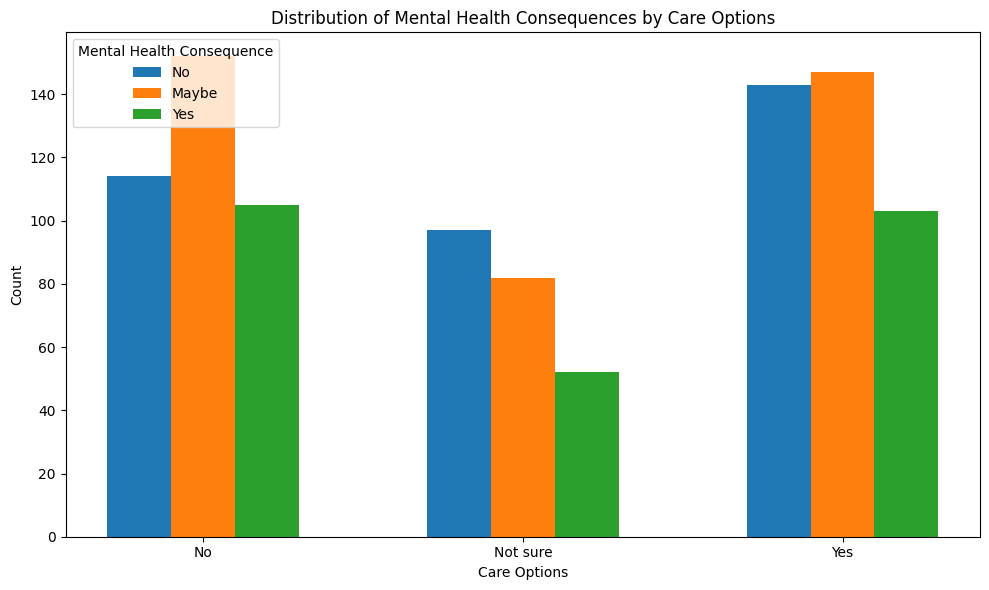

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
columns_of_interest = ['care_options', 'mental_health_consequence']
df = cleaned_df[columns_of_interest].copy()

df.dropna(inplace=True)

care_options_order = ['No', 'Maybe', 'Yes']
consequence_order = ['No', 'Maybe', 'Yes']

grouped_data = df.groupby(['care_options', 'mental_health_consequence']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

bar_width = 0.2

plt.bar([0, 1, 2], grouped_data['No'], width=bar_width, label='No')

plt.bar([0 + bar_width, 1 + bar_width, 2 + bar_width], grouped_data['Maybe'], width=bar_width, label='Maybe')

plt.bar([0 + 2 * bar_width, 1 + 2 * bar_width, 2 + 2 * bar_width], grouped_data['Yes'], width=bar_width, label='Yes')

plt.title('Distribution of Mental Health Consequences by Care Options')
plt.xlabel('Care Options')
plt.ylabel('Count')
plt.xticks([0.2, 1.2, 2.2], grouped_data.index)
plt.legend(title='Mental Health Consequence', loc='upper left')

plt.tight_layout()
plt.show()

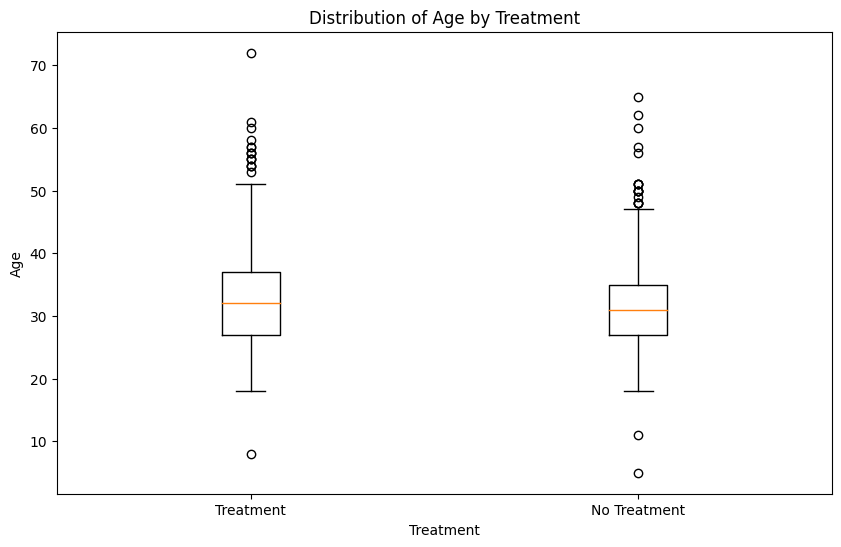

In [ ]:
import matplotlib.pyplot as plt

age_treatment = cleaned_df[cleaned_df['treatment'] == 'Yes']['Age']
age_no_treatment = cleaned_df[cleaned_df['treatment'] == 'No']['Age']

plt.figure(figsize=(10, 6))
plt.boxplot([age_treatment, age_no_treatment], labels=['Treatment', 'No Treatment'])

plt.title('Distribution of Age by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.show()

#Plans for Future
- Compare whether remote work or not to work interference
- Compare benefits to remote work and interference
- Compare anoniminity to severity of responses
- Seek help compared to perceived working conditions

Overall, due to this data being provided by an anonymous survey, much of the data had holes where people either couldn't or chose not to identify certain options, with more resources I would have liked to use the survey data comparitively with other statistical evidence to further understand missing or otherwise unavailable data.